<a href="https://colab.research.google.com/github/reitezuz/18NES1-2025-/blob/main/week13/neural_gas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural gas - simple example

## Algorithm Steps

1. **Initialize** `k` neurons with random positions in the data space.
2. For a fixed number of **epochs**:
   - Shuffle the training data.
   - For each data point `x`:
     1. Compute distances from `x` to all neurons.
     2. Sort the neurons by increasing distance (rank them).
     3. Update each neuron based on its rank:

  $$
      \mathbf{w}_i \leftarrow \mathbf{w}_i + \alpha \cdot h(k_i) \cdot (\mathbf{x} - \mathbf{w}_i)
  $$

      Where:

      - $\alpha$ is the learning rate (decreases over time)
      - $h(k_i) = \exp(-k_i / \lambda)$ is the neighborhood function (based on rank $k_i$)
      - $k_i$ is the rank of neuron $i$ for input $\mathbf{x}$
      - $\lambda$ is the neighborhood width (also decreases over time)
       
3. After training, the neuron positions represent the learned structure of the data.

## Parameters

- `n_neurons`: Number of representants (neurons)
- `n_epochs`: Number of training epochs
- `learning_rate`: Initial step size (e.g. 0.5)
- `lambda`: Initial neighborhood width (usually ≈ n_neurons / 2)


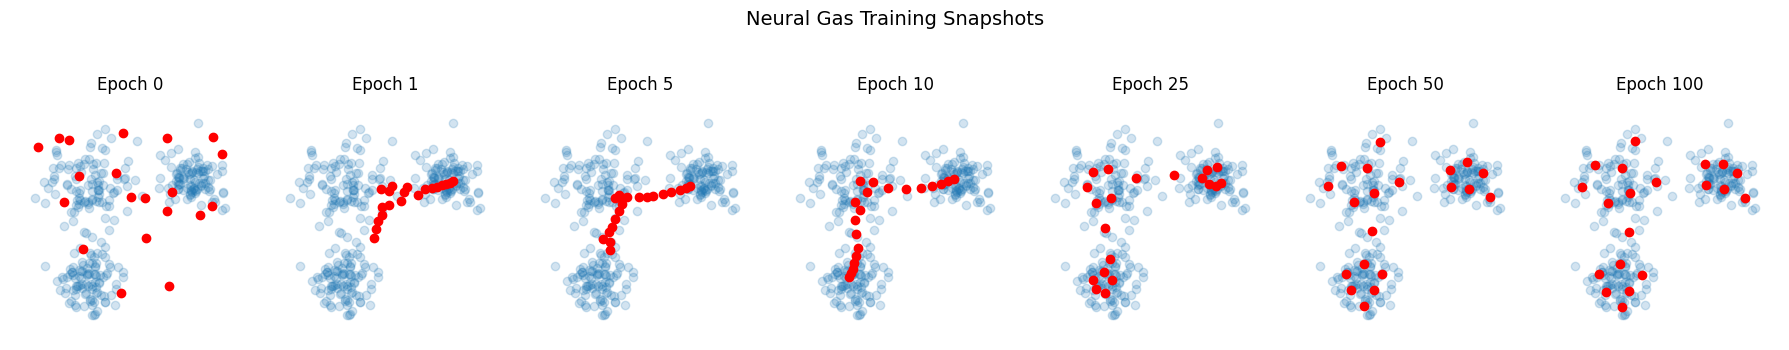

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- Generate synthetic data ---
np.random.seed(42)
data1 = np.random.randn(100, 2) * 0.7 + [2, 2]
data2 = np.random.randn(100, 2) * 0.6 + [6, 6]
data3 = np.random.randn(100, 2) * 0.9 + [2, 6]
data = np.vstack([data1, data2, data3])

# --- Neural Gas setup ---
n_neurons = 20
n_epochs = 100
snapshots = [0, 1, 5, 10, 25, 50, 100]
#snapshots = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
learning_rate_initial = 0.5
lambda_initial = n_neurons / 2

neurons = np.random.uniform(low=data.min(axis=0), high=data.max(axis=0), size=(n_neurons, 2))
history = {0: neurons.copy()}  # save initial state

# --- Training with snapshots ---
for epoch in range(1, n_epochs + 1):
    np.random.shuffle(data)
    lr = learning_rate_initial * (0.01 / learning_rate_initial) ** (epoch / n_epochs)
    lambd = lambda_initial * (0.01 / lambda_initial) ** (epoch / n_epochs)

    for x in data:
        distances = np.linalg.norm(neurons - x, axis=1)
        ranks = np.argsort(distances)
        for k, i in enumerate(ranks):
            h = np.exp(-k / lambd)
            neurons[i] += lr * h * (x - neurons[i])

    if epoch in snapshots:
        history[epoch] = neurons.copy()

# --- Plot snapshots ---
fig, axes = plt.subplots(1, len(snapshots), figsize=(18, 4))
for ax, epoch in zip(axes, snapshots):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.2, label='Data')
    n = history[epoch]
    ax.scatter(n[:, 0], n[:, 1], color='red', label='Neurons')

    # Optionally: connect neurons
    #for i in range(len(n)):
    #    for j in range(i + 1, len(n)):
    #        ax.plot([n[i, 0], n[j, 0]], [n[i, 1], n[j, 1]], color='gray', alpha=0.05)

    ax.set_title(f"Epoch {epoch}")
    ax.set_xlim(data[:, 0].min() - 1, data[:, 0].max() + 1)
    ax.set_ylim(data[:, 1].min() - 1, data[:, 1].max() + 1)
    ax.set_aspect('equal')
    ax.axis('off')

plt.suptitle("Neural Gas Training Snapshots", fontsize=14)
plt.tight_layout()
plt.show()
